In [2]:
import acoular
import matplotlib.pyplot as pl
import ipywidgets as ipw
import numpy as np
from glob import glob
from os import path
import pylab as plt
import math as m
import mpl_toolkits.mplot3d
import os


In [3]:
#Einlesen der Micgeo
micgeofile = 'mic_geo.xml'
mg = acoular.MicGeom(from_file=micgeofile)
mg.mpos[0] = - mg.mpos[0] #Spiegeln
mg.mpos[0] = mg.mpos[0] + 0.419 #Versatz
#print(mg.mpos)

#Rotationsmatrix
def Rx(theta):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])

for i in range (64):
    Punkt = [mg.mpos[0][i],mg.mpos[1][i],mg.mpos[2][i]]
    rot = np.array(Punkt * Rx(np.radians(-45)))
    #print(rot[0][0])
    mg.mpos[0][i] = rot[0][0]
    mg.mpos[1][i] = rot[0][1]
    mg.mpos[2][i] = rot[0][2]
mg.mpos[1] = - mg.mpos[1]

#plt.ion()
#plt.plot(mg.mpos[2],mg.mpos[1],'o')

# Umgebung definieren (Medium, Strömung etc)
t = 23.6
e = acoular.Environment(c = 20.05*np.sqrt(273+t))

if not os.path.exists(f'Plots'):
        os.makedirs(f'Plots')

In [23]:
#Finales Plotten läd ewig!!!!
'''
messung = ['004', '006', '008' ,'011', '013', '015', '017', '019', '021', '023', '025']
loc1 = [(1.5, 0.2, 2.0),(4.5, 0.2, 6.0), (4.5, 0.2, 6.0), (7.5, 0.2, 10.0), (7.5, 0.2, 10.0), (0, 0.2, 2.0), (0, 0.2, 6.0), (0, 0.2, 10.0), (1.5, 0.2, 2.0), (1.5, 0.2, 2.0), (0, 0.2, 2.0) ]
loc2 = [(-1.0, 0.2, 1.6),(0, 0, 0), (-3.0, 0.2, 4.8), (0, 0, 0), (-5.0, 0.2, 8.0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (-3.0, 0.2, 4.8), (0, 0, 0), (0, 0, 0)]
frequencies = [500, 800, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000, 7000, 8000 ]
freq_RANGE = [np.min(frequencies),np.max(frequencies)]
INCREMENT = 0.02
BLOCK_SIZE = 512
'''
#Zum testen hier erstmal nur die ersten beiden Messung für for schleife
messung = ['004', '006']
loc1 = [(1.5, 0.2, 2.0),(4.5, 0.2, 6.0), (4.5, 0.2, 6.0), (7.5, 0.2, 10.0), (7.5, 0.2, 10.0), (0, 0.2, 2.0), (0, 0.2, 6.0), (0, 0.2, 10.0), (1.5, 0.2, 2.0), (1.5, 0.2, 2.0), (0, 0.2, 2.0) ]
loc2 = [(-1.0, 0.2, 1.6),(0, 0, 0), (-3.0, 0.2, 4.8), (0, 0, 0), (-5.0, 0.2, 8.0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (-3.0, 0.2, 4.8), (0, 0, 0), (0, 0, 0)]
frequencies = [1500]
freq_RANGE = [np.min(frequencies),np.max(frequencies)]
INCREMENT = 0.1
BLOCK_SIZE = 128


In [5]:
#Simuliertes Signal erzeugen
sfreq = 51200
duration = 1
nsamples = duration*sfreq

sim_signal1 = acoular.WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=1)
sim_signal2 = acoular.WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=2)

In [32]:
Lm_x_max

(array([57]), array([26]))

[('msm_006_cache.h5', 1), ('SourceMixer_1b4efcbffa49af21532058b5544d26ec_cache.h5', 1)]


<ipython-input-29-eed446ea1311>:52: Warning: Beamforming result may not have been calculated for all queried frequencies. Check freq_data.ind_low and freq_data.ind_high!
  pm_sim = bb_sim.synthetic(Frequenz, 3)


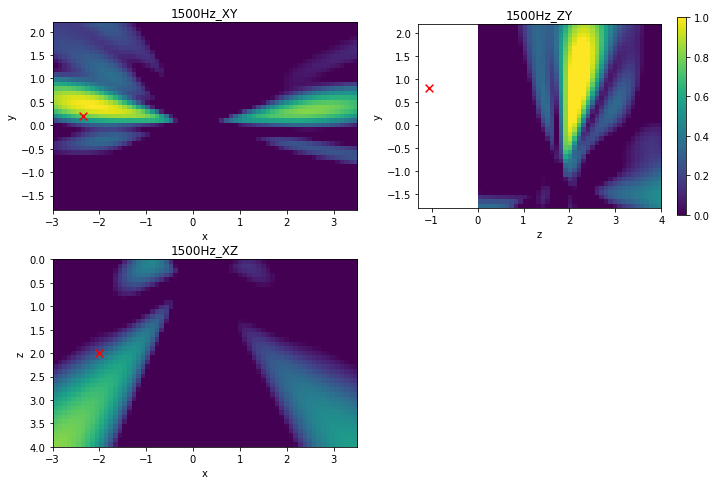

[('SourceMixer_1b4efcbffa49af21532058b5544d26ec_cache.h5', 1), ('msm_004_cache.h5', 1)]


<ipython-input-29-eed446ea1311>:129: Warning: Beamforming result may not have been calculated for all queried frequencies. Check freq_data.ind_low and freq_data.ind_high!
  pm = bb.synthetic(Frequenz, 3)


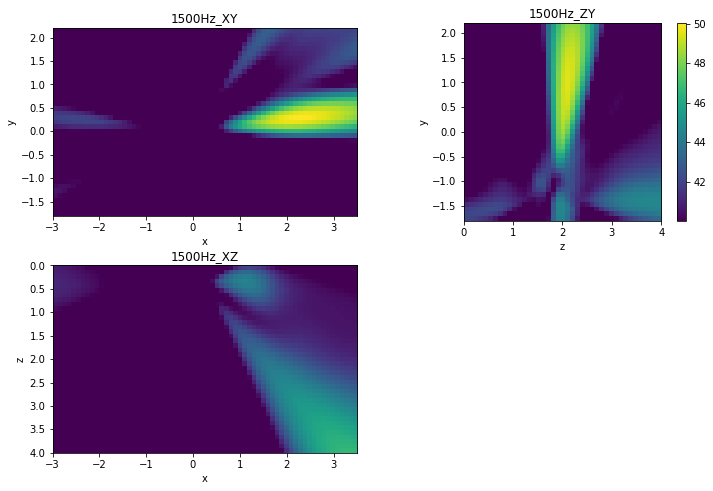

[('msm_004_cache.h5', 1), ('PointSource_c44c9e636c2c38c74014e34d4ac138f6_cache.h5', 1)]


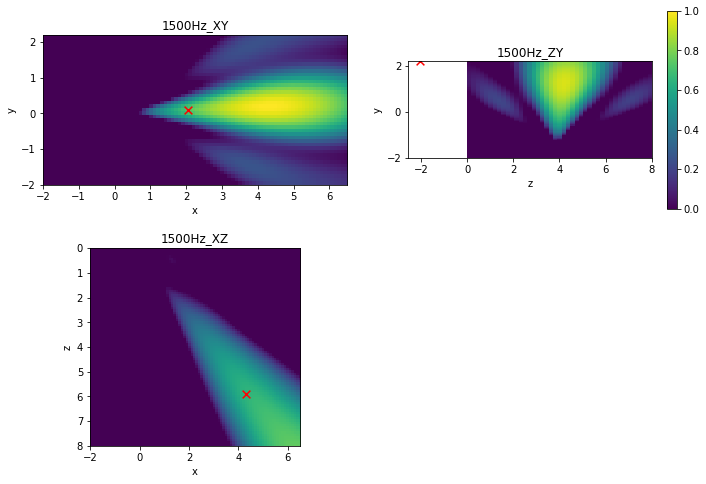

[('PointSource_c44c9e636c2c38c74014e34d4ac138f6_cache.h5', 1), ('msm_006_cache.h5', 1)]


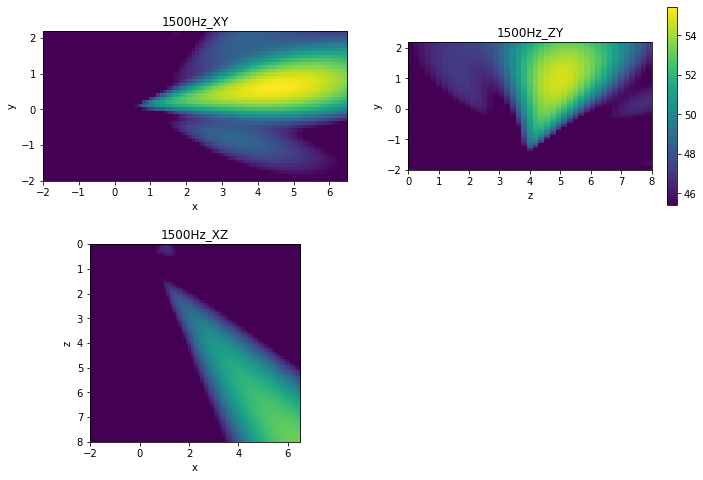

In [29]:

for i, mess in enumerate (messung):
    
    ############## SIMULATIONEN ################
    if (loc2[i] == (0,0,0)):
        sim_ts = acoular.PointSource(signal = sim_signal1,          # Signal der Quelle
                                     loc = loc1[i],  # Position der Punktquelle im links-orientierten Koordinatensystem
                                     mics = mg,            # Mikrofongeometrie, auf der Messdaten erzeugt werden sollen
                                     env = e)             # Umgebung, in der sich das Schallfeld ausbreitet
        
    else:
        sim_ts1 = acoular.PointSource(signal = sim_signal1,          # Signal der Quelle
                                      loc = loc1[i],  # Position der Punktquelle im links-orientierten Koordinatensystem
                                      mics = mg,            # Mikrofongeometrie, auf der Messdaten erzeugt werden sollen
                                      env = e)             # Umgebung, in der sich das Schallfeld ausbreitet
        sim_ts2 = acoular.PointSource(signal = sim_signal2,          # Signal der Quelle
                                      loc = loc2[i],  # Position der Punktquelle im links-orientierten Koordinatensystem
                                      mics = mg,            # Mikrofongeometrie, auf der Messdaten erzeugt werden sollen
                                      env = e)             # Umgebung, in der sich das Schallfeld ausbreitet
        sim_ts = acoular.SourceMixer(sources=[sim_ts1,sim_ts2])

    #Grid erstellen
    rg = acoular.RectGrid3D(x_min=np.minimum(loc1[i][0],loc2[i][0])-2, x_max=np.maximum(loc1[i][0],loc2[i][0])+2, 
                            y_min=np.minimum(loc1[i][1],loc2[i][1])-2, y_max=np.maximum(loc1[i][1],loc2[i][1])+2, 
                            z_min=0, z_max=np.maximum(loc1[i][2],loc2[i][2])+2, 
                            increment=INCREMENT)

    #Steering Vector
    st = acoular.SteeringVector(grid=rg, 
                                mics=mg, 
                                #ref=1,     # Tipp von Gert, ref auf 1m, stimmt das so? Und wieso?
                                env = e,
                                steer_type = 'true location') # ???

    #Spectrum erstellen:
    ps_sim = acoular.PowerSpectra( time_data=sim_ts, 
                                   block_size=BLOCK_SIZE,
                                   freq_range=[freq_RANGE[0], freq_RANGE[1]],
                                   window='Hanning' ) # Für bessere Auflösung hier Block_size erhöhen -> höherer Rechnenaufwand, daher jetzt erstmal mit 128


    bb_sim = acoular.BeamformerBase( freq_data=ps_sim, 
                                     steer=st )


    #Hier den Pfad für die Ordner eintragen
    if not os.path.exists(f'Plots/Messung_{mess}'):
        os.makedirs(f'Plots/Messung_{mess}')

    

    for index, Frequenz in enumerate (frequencies):
        pm_sim = bb_sim.synthetic(Frequenz, 3)

        fig=plt.figure(1,(12,8))

        # plot the results

        plt.subplot(221)
        map_z = np.sum(pm_sim,2)
        mx = acoular.L_p(map_z.max())
        Lm_z = acoular.L_p(map_z)
        Lm_z_max = np.where(Lm_z == np.amax(Lm_z))
        plt.imshow(Lm_z.T, 
                   vmax=mx,
                   vmin=mx-10, 
                   origin='lower', 
                   interpolation='nearest', 
                   extent=(rg.x_min, rg.x_max, rg.y_min, rg.y_max))
        plt.scatter(Lm_z_max[0]*rg.increment-((rg.x_max-rg.x_min)/2),Lm_z_max[1]*rg.increment-((rg.y_max-rg.y_min)/2), s = 60, c='red',  marker = 'x')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'{Frequenz}Hz_XY')
        
        #plt.close(fig)

        plt.subplot(223)
        map_y = np.sum(pm_sim,1)
        if (rg.y_min == rg.y_max):
            mx = acoular.L_p(map_y.max())
        Lm_y = acoular.L_p(map_y)
        Lm_y_max = np.where(Lm_y == np.amax(Lm_y))    
        plt.imshow(Lm_y.T, 
                   vmax=mx, vmin=mx-10, 
                   origin='upper', 
                   interpolation='nearest', 
                   extent=(rg.x_min, rg.x_max, rg.z_max, rg.z_min))
        plt.scatter(Lm_y_max[0]*rg.increment-((rg.z_max-rg.z_min)/2),Lm_y_max[1]*rg.increment-((rg.y_max-rg.y_min)/2), s = 60, c='red',  marker = 'x')
        plt.xlabel('x')
        plt.ylabel('z')
        plt.title(f'{Frequenz}Hz_XZ' )
        
        
        
        plt.subplot(222)
        map_x = np.sum(pm_sim,0)
        if (rg.x_min == rg.x_max):
            mx = acoular.L_p(map_x.max())
        Lm_x = acoular.L_p(map_x)
        Lm_x_max = np.where(Lm_x == np.amax(Lm_x))       
        plt.imshow(Lm_x.T, 
                   vmax=mx, 
                   vmin=mx-10, 
                   origin='lower', 
                   interpolation='nearest', 
                   extent=(rg.z_min, rg.z_max,rg.y_min, rg.y_max))
        plt.scatter(Lm_x_max[0]*rg.increment-((rg.x_max-rg.x_min)/2),Lm_x_max[1]*rg.increment-((rg.z_max-rg.z_min)/2), s = 60, c='red',  marker = 'x')
        plt.xlabel('z')
        plt.ylabel('y')
        plt.title(f'{Frequenz}Hz_ZY')
        plt.colorbar()
        plt.tight_layout
        
        plt.savefig(f'Plots/Messung_{mess}/{Frequenz}Hz_Messung_{mess}_simulated.png')
        plt.pause(0.1)

    ################# Messungen ######################
    ts = acoular.TimeSamples( name=f'Messungen_WFS/msm_{mess}.h5' )   

    #Spectrum erstellen:
    ps = acoular.PowerSpectra( time_data=ts, 
                            block_size=BLOCK_SIZE,
                            freq_range=[freq_RANGE[0], freq_RANGE[1]],
                            window='Hanning' ) # Für bessere Auflösung hier Block_size erhöhen -> höherer Rechnenaufwand, daher jetzt erstmal mit 128


    bb = acoular.BeamformerBase( freq_data=ps, 
                                steer=st )   
    for index, Frequenz in enumerate (frequencies):
        pm = bb.synthetic(Frequenz, 3)

        fig=plt.figure(1,(12,8))

        # plot the results

        plt.subplot(221)
        map_z = np.sum(pm,2)
        mx = acoular.L_p(map_z.max())
        Lm_z = acoular.L_p(map_z)
        Lm_z_max = np.where(Lm_z == np.amax(Lm_z))
        plt.imshow(Lm_z.T, 
                   vmax=mx, 
                   vmin=mx-10, 
                   origin='lower', 
                   interpolation='nearest', 
                   extent=(rg.x_min, rg.x_max, rg.y_min, rg.y_max))
        #plt.scatter(Lm_z_max[0]*rg.increment-((rg.x_max-rg.x_min)/2),Lm_z_max[1]*rg.increment-((rg.y_max-rg.y_min)/2), s = 60, c='red',  marker = 'x')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'{Frequenz}Hz_XY')
        
        #plt.close(fig)

        plt.subplot(223)
        map_y = np.sum(pm,1)
        if (rg.y_min == rg.y_max):
            mx = acoular.L_p(map_y.max())
        Lm_y = acoular.L_p(map_y.T)
        Lm_y_max = np.where(Lm_y == np.amax(Lm_y))
        plt.imshow(Lm_y, 
                   vmax=mx, 
                   vmin=mx-10, 
                   origin='upper', 
                   interpolation='nearest', 
                   extent=(rg.x_min, rg.x_max, rg.z_max, rg.z_min))
        #plt.scatter(Lm_y_max[0]*rg.increment-((rg.x_max-rg.x_min)/2),Lm_y_max[1]*rg.increment-((rg.y_max-rg.y_min)/2), s = 60, c='red',  marker = 'x')
        plt.xlabel('x')
        plt.ylabel('z')
        plt.title(f'{Frequenz}Hz_XZ' )
        
        
        
        plt.subplot(222)
        map_x = np.sum(pm,0)
        if (rg.x_min == rg.x_max):
            mx = acoular.L_p(map_x.max())
        Lm_x = acoular.L_p(map_x.T)
        Lm_x_max = np.where(Lm_x == np.amax(Lm_x))   
        plt.imshow(Lm_x, 
                   vmax=mx, 
                   vmin=mx-10, 
                   origin='lower', 
                   interpolation='nearest', 
                   extent=(rg.z_min, rg.z_max,rg.y_min, rg.y_max))
        #plt.scatter(Lm_x_max[0]*rg.increment-((rg.x_max-rg.x_min)/2),Lm_x_max[1]*rg.increment-((rg.y_max-rg.y_min)/2), s = 60, c='red',  marker = 'x')
        plt.xlabel('z')
        plt.ylabel('y')
        plt.title(f'{Frequenz}Hz_ZY')
        plt.colorbar()
        plt.tight_layout
        
        plt.savefig(f'Plots/Messung_{mess}/{Frequenz}Hz_Messung_{mess}_measured.png')
        plt.pause(0.1)

Einlesen der Daten: